## 정적 크롤링 ##

In [1]:
# 필요 모듈 설치
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import datetime

In [3]:
# 정보를 담을 빈 리스트 생성
result = []

In [4]:
# Start Crawling
for page in range(1,59):
  Hollys_url = f'https://www.hollys.co.kr/store/korea/korStore.do?pageNo={page}&sido=&gugun=&store='
  print(Hollys_url)
  html = urllib.request.urlopen(Hollys_url)
  soupHollys = BeautifulSoup(html, 'html.parser')
  tag_tbody = soupHollys.find('tbody')
  for store in tag_tbody.find_all('tr'):
    if len(store) <= 3:
      break
    store_td = store.find_all('td')
    store_name = store_td[1].string
    store_sido = store_td[0].string
    store_address = store_td[3].string
    store_phone = store_td[5].string
    result.append([store_name]+[store_sido]+[store_address]+[store_phone])

https://www.hollys.co.kr/store/korea/korStore.do?pageNo=1&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=2&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=3&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=4&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=5&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=6&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=7&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=8&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=9&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=10&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=11&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=12&sido=&gugun=&store=
https://www.hollys.co.kr/store/korea/korStore.do?pageNo=13&si

In [5]:
#check data
print(result)

[['부천심곡점', '경기 부천시 소사구', '경기도 부천시 장말로 376 심곡동 355-1', '032-612-7258'], ['성남터미널점', '경기 성남시 분당구', '경기도 성남시 분당구 성남대로925번길 16, 성남종합버스터미널 1층', '031-725-1004'], ['부산백양대로점', '부산 사상구', '괘법동 141', '051-311-5399'], ['왕십리역점', '서울 성동구', '성동구 왕십리광장로 17 (행당동 168-151 ), 비트플렉스몰 3층', '02-2200-1303'], ['홍대출판사거리점', '서울 마포구', '서울시 마포구 독막로7길 40, 1층', '02-332-3567'], ['간석오거리점', '인천 남동구', None, '032-425-0915'], ['위례중앙점', '경기 성남시 수정구', None, '031-755-5064'], ['수유사거리점', '서울 강북구', '서울시 강북구 도봉로 82길 11 (2~4층)', '070-5226-1999'], ['하남덕풍점', '경기 하남시', '덕풍북로 2', '031-792-9389'], ['전경련회관점', '서울 영등포구', '서울시 영등포구 여의도동 28-1 전경련신축회관 B109-11', '02-786-3485'], ['대전만년점', '대전 서구', '대전 서구 둔산대로117번길 95(만년동, 리더스타운)', None], ['대전탄방점', '대전 서구', '대전 서구 계룡로571번길 23-19', '042-482-8425'], ['신월사거리점', '서울 양천구', '가로공원로 113, 1층', '02-2606-5040'], ['양산부산대병원치과동점', '경남 양산시', '물금읍 금오로 20 양산부산대학교병원 치과병동 1층', '070-4442-0608'], ['양산부산대병원본점', '경남 양산시', '물금읍 금오로 20, 양산부산대학교병원 중앙진료동 1층', '055-362-4582'], ['대전역점', '대전 동구', '대전 동구 중앙로 215, 3층 대합실', N

In [6]:
# DataFrame 생성
hollys_tbl = pd.DataFrame(result, columns=('store', 'sido-gu', 'address', 'phone'))

In [7]:
#csv로 저장하기
hollys_tbl.to_csv('/content/sample_data/hollys1_2019111382_김세희.csv', encoding='cp949', mode='w', index=True)

## 보충 ##

In [8]:
import seaborn as sns

# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family="NanumBarunGothic")

mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
NanumBarunGothic


In [9]:
hollys_tbl.info

<bound method DataFrame.info of         store     sido-gu                                  address  \
0       부천심곡점  경기 부천시 소사구                경기도 부천시 장말로 376 심곡동 355-1   
1      성남터미널점  경기 성남시 분당구   경기도 성남시 분당구 성남대로925번길 16, 성남종합버스터미널 1층   
2     부산백양대로점      부산 사상구                                  괘법동 141   
3       왕십리역점      서울 성동구  성동구 왕십리광장로 17 (행당동 168-151 ), 비트플렉스몰 3층   
4    홍대출판사거리점      서울 마포구                     서울시 마포구 독막로7길 40, 1층   
..        ...         ...                                      ...   
562      마포역점      서울 마포구          서울시 마포구 도화동 555 한화오벨리스크B1 137~9   
563       금천점      서울 금천구               서울시 금천구 시흥대로 399, 씨티렉스604호   
564      영등포점     서울 영등포구                        서울시 영등포구 경인로 847    
565       신촌점     서울 서대문구                         서울시 서대문구 연세로 34    
566       성남점  경기 성남시 수정구              경기도 성남시 수정구 수정로 175, 동일빌딩1층   

             phone  
0     032-612-7258  
1     031-725-1004  
2     051-311-5399  
3     02-2200-1303  
4      02-332-3567  
.

In [10]:
hollys_tbl.head()

,store,sido-gu,address,phone
0,부천심곡점,경기 부천시 소사구,경기도 부천시 장말로 376 심곡동 355-1,032-612-7258
1,성남터미널점,경기 성남시 분당구,"경기도 성남시 분당구 성남대로925번길 16, 성남종합버스터미널 1층",031-725-1004
2,부산백양대로점,부산 사상구,괘법동 141,051-311-5399
3,왕십리역점,서울 성동구,"성동구 왕십리광장로 17 (행당동 168-151 ), 비트플렉스몰 3층",02-2200-1303
4,홍대출판사거리점,서울 마포구,"서울시 마포구 독막로7길 40, 1층",02-332-3567


In [11]:
# 위도 경도 얻기, 카카오 API 사용
import requests, json

def get_location(address):
  url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + address
  headers = {"Authorization": "KakaoAK 91ae5b2346cea492aa1f107640327d6e"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  lat = address['y']
  lng = address['x']
  address_name = address['address_name']

  return lat, lng

In [12]:
hollys_tbl['위도'] = pd.Series()
hollys_tbl['경도'] = pd.Series()

hollys_tbl.head()

<ipython-input-12-a5569b7e5c89>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hollys_tbl['위도'] = pd.Series()
<ipython-input-12-a5569b7e5c89>:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hollys_tbl['경도'] = pd.Series()


,store,sido-gu,address,phone,위도,경도
0,부천심곡점,경기 부천시 소사구,경기도 부천시 장말로 376 심곡동 355-1,032-612-7258,NaN,NaN
1,성남터미널점,경기 성남시 분당구,"경기도 성남시 분당구 성남대로925번길 16, 성남종합버스터미널 1층",031-725-1004,NaN,NaN
2,부산백양대로점,부산 사상구,괘법동 141,051-311-5399,NaN,NaN
3,왕십리역점,서울 성동구,"성동구 왕십리광장로 17 (행당동 168-151 ), 비트플렉스몰 3층",02-2200-1303,NaN,NaN
4,홍대출판사거리점,서울 마포구,"서울시 마포구 독막로7길 40, 1층",02-332-3567,NaN,NaN


In [13]:
# 총 576개의 rows
out_of_list = 0

for adds in range(576):
  try:
    address = str(hollys_tbl.loc[adds, 'address'])
    hollys_tbl.loc[adds, '위도'], hollys_tbl.loc[adds,'경도'] = get_location(address)
  except:
    out_of_list += 1

print("exceptions : ", out_of_list)

exceptions :  63


In [14]:
#위도 경도가 잘 입력됨
hollys_tbl.head()

,store,sido-gu,address,phone,위도,경도
0,부천심곡점,경기 부천시 소사구,경기도 부천시 장말로 376 심곡동 355-1,032-612-7258,37.4897862627203,126.783640074639
1,성남터미널점,경기 성남시 분당구,"경기도 성남시 분당구 성남대로925번길 16, 성남종합버스터미널 1층",031-725-1004,37.4130898626282,127.127281078932
2,부산백양대로점,부산 사상구,괘법동 141,051-311-5399,35.1630265508373,128.990467773131
3,왕십리역점,서울 성동구,"성동구 왕십리광장로 17 (행당동 168-151 ), 비트플렉스몰 3층",02-2200-1303,37.5614417528647,127.038394194396
4,홍대출판사거리점,서울 마포구,"서울시 마포구 독막로7길 40, 1층",02-332-3567,37.549457968869,126.919704841753


<Axes: xlabel='경도', ylabel='위도'>

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45909 (\N{HANGUL SYLLABLE DEOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54036 (\N{HANGUL SYLLABLE PAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50725 (\N{HANGUL SYLLABLE OG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47749 (\N{HANGUL SYLL

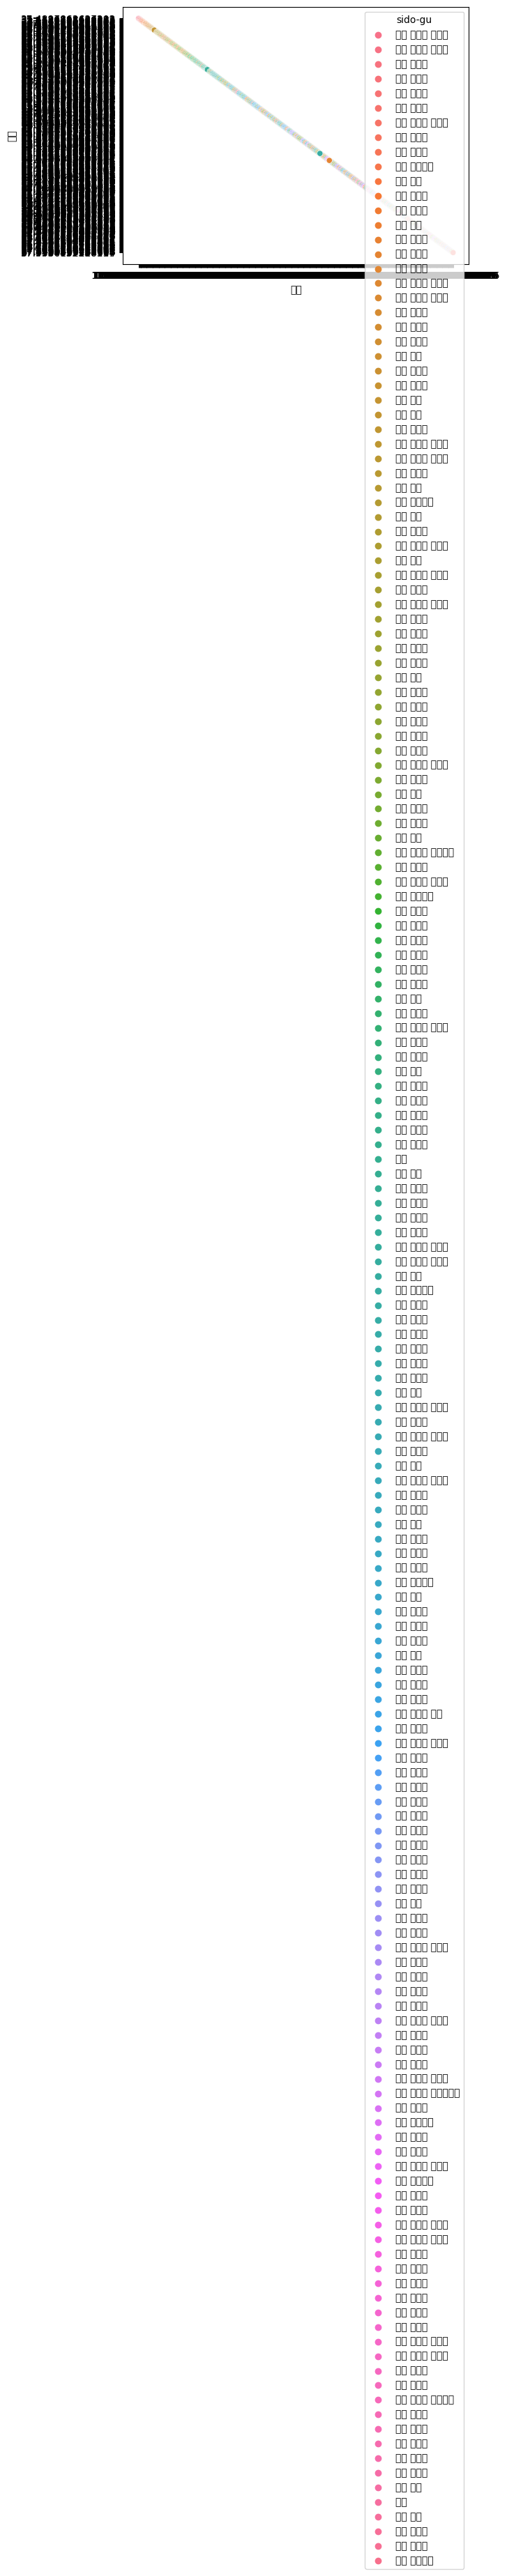

In [ ]:
sns.scatterplot(data = hollys_tbl, x = '경도', y = '위도', hue = "sido-gu")